In [1]:
import json

pdf = "WhatIsOMERO.pdf"
# Load the JSON file containing the image paths and corresponding text
with open(f"dict_{pdf}.json", "r") as json_file:
    slide_dict = json.load(json_file)

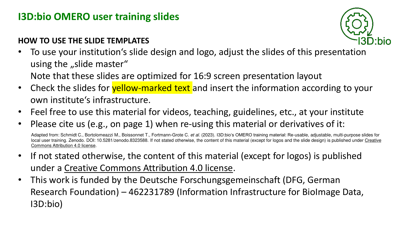

Slide Text: I3D:bio OMERO user training slides
HOW TO USE THE SLIDE TEMPLATES
• To use your institution‘s slide design and logo, adjust the slides of this presentation
using the „slide master“
Note that these slides are optimized for 16:9 screen presentation layout
• Check the slides for yellow-marked text and insert the information according to your
own institute‘s infrastructure.
• Feel free to use this material for videos, teaching, guidelines, etc., at your institute
• Please cite us (e.g., on page 1) when re-using this material or derivatives of it:
Adaptedfrom: Schmidt C., Bortolomeazzi M., Boissonnet T., Fortmann-Grote C. et al. (2023). I3D:bio‘s OMERO training material: Re-usable, adjustable, multi-purpose slides for
local user training. Zenodo.DOI: 10.5281/zenodo.8323588. Ifnot statedotherwise, thecontentof thismaterial (exceptforlogosand theslidedesign) ispublishedunderCreative
Commons Attribution 4.0 license.
• If not stated otherwise, the content of this material (except fo

In [2]:
from PIL import Image

#Function to display an image-text pair
def display_image_text_pair(image_path, text):
    # Open the image
    img = Image.open(image_path)
    
    # Display the image
    display(img)
    
    # Display the text
    print("Slide Text:", text)

# Replace 'slide_1.png' with the desired key from your dictionary
image_path = "slide1.png"
text = slide_dict[image_path]
display_image_text_pair(image_path, text)

In [3]:
from pdf2image import convert_from_path
from IPython.display import display
from PIL import Image
from pdf_utilities import load_pdf, save_images, text_extraction
from endpoints import prompt_chatgpt, prompt_llama_11b, prompt_llama_90b, prompt_phi, prompt_gpt_mini

pdf = "WhatIsOMERO.pdf"
slides = load_pdf(pdf)
texts = text_extraction(pdf, slides)

### Pip install the model

`!pip install -U mixedbread-ai sentence-transformers`

In [4]:
from sentence_transformers import SentenceTransformer
from sentence_transformers.util import cos_sim

# Load the model
model = SentenceTransformer("mixedbread-ai/mxbai-embed-large-v1")

In [5]:
embedding = model.encode(text[0])
print("Embedding shape:", embedding.shape)

Embedding shape: (1024,)


In [23]:
page_data = []
for i, text in enumerate(texts):
        # Get embedding
        embedding = model.encode(text)

        page_data.append({
            'filename': pdf,
            'page_index': i,
            'text': text,
            'png_filename': f"slide{i+1}.png",
            'embedding': embedding
        })

In [24]:
import pandas as pd

df = pd.DataFrame(page_data)

In [25]:
df

,filename,page_index,text,png_filename,embedding
0,WhatIsOMERO.pdf,0,I3D:bio OMERO user training slides\nHOW TO USE...,slide1.png,"[0.4003333, -0.33649126, 0.39981106, -0.473099..."
1,WhatIsOMERO.pdf,1,Disclaimer\n• The following slides are intende...,slide2.png,"[0.39082658, -0.28587455, 0.38830236, -0.37186..."
2,WhatIsOMERO.pdf,2,Research Data Management for Bioimage Data\nat...,slide3.png,"[0.18631458, -0.3715705, -0.016562128, -0.6950..."
3,WhatIsOMERO.pdf,3,OMERO: An open-source software for image data ...,slide4.png,"[0.1806397, -0.6081787, -0.6387917, -0.4824682..."
4,WhatIsOMERO.pdf,4,From isolated data silos…\np 5 ADD LOGO SMALL,slide5.png,"[-0.44303596, -0.50006086, 0.52318454, -0.3337..."
5,WhatIsOMERO.pdf,5,"… to centralized, structured data management\n...",slide6.png,"[-0.16422987, -0.5776923, 0.6634136, -0.554668..."
6,WhatIsOMERO.pdf,6,OMERO at the ADD INSTITUTE HERE\nService provi...,slide7.png,"[-0.62620574, 0.008420461, -0.89739054, -0.598..."
7,WhatIsOMERO.pdf,7,Advantages of using OMERO\n• Organize your ori...,slide8.png,"[0.030079262, 0.27903175, -0.33694014, -0.8887..."
8,WhatIsOMERO.pdf,8,Contact\nPlease review the additional informat...,slide9.png,"[-0.23266867, -0.5224059, 0.050569788, -0.4461..."


In [9]:
!pip install umap-learn

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


  Using cached umap_learn-0.5.7-py3-none-any.whl (88 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 KB 1.2 MB/s eta 0:00:001.2 MB/s eta 0:00:01
  Using cached numba-0.60.0-cp310-cp310-manylinux2014_x86_64.manylinux_2_17_x86_64.whl (3.7 MB)
  Using cached pynndescent-0.5.13-py3-none-any.whl (56 kB)
  Using cached scikit_learn-1.5.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (13.3 MB)
  Using cached llvmlite-0.43.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (43.9 MB)
  Using cached numpy-2.0.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (19.5 MB)
  Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl (18 kB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.1.3
    Uninstalling numpy-2.1.3:
      Successfully uninstalled numpy-2.1.3


In [26]:
import numpy as np
import umap.umap_ as umap

# Convert embedding vectors to numpy array for UMAP
embeddings = np.array(df['embedding'].tolist())

# Apply UMAP
reducer = umap.UMAP(n_components=2, random_state=42)
umap_embeddings = reducer.fit_transform(embeddings)

df['UMAP0'] = umap_embeddings[:, 0]
df['UMAP1'] = umap_embeddings[:, 1]

df

/home/lea/.local/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/home/lea/.local/lib/python3.10/site-packages/umap/umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


,filename,page_index,text,png_filename,embedding,UMAP0,UMAP1
0,WhatIsOMERO.pdf,0,I3D:bio OMERO user training slides\nHOW TO USE...,slide1.png,"[0.4003333, -0.33649126, 0.39981106, -0.473099...",22.988615,6.322064
1,WhatIsOMERO.pdf,1,Disclaimer\n• The following slides are intende...,slide2.png,"[0.39082658, -0.28587455, 0.38830236, -0.37186...",23.344933,5.576495
2,WhatIsOMERO.pdf,2,Research Data Management for Bioimage Data\nat...,slide3.png,"[0.18631458, -0.3715705, -0.016562128, -0.6950...",23.924927,6.251481
3,WhatIsOMERO.pdf,3,OMERO: An open-source software for image data ...,slide4.png,"[0.1806397, -0.6081787, -0.6387917, -0.4824682...",23.767023,6.962986
4,WhatIsOMERO.pdf,4,From isolated data silos…\np 5 ADD LOGO SMALL,slide5.png,"[-0.44303596, -0.50006086, 0.52318454, -0.3337...",22.896355,7.774837
5,WhatIsOMERO.pdf,5,"… to centralized, structured data management\n...",slide6.png,"[-0.16422987, -0.5776923, 0.6634136, -0.554668...",22.525280,7.269181
6,WhatIsOMERO.pdf,6,OMERO at the ADD INSTITUTE HERE\nService provi...,slide7.png,"[-0.62620574, 0.008420461, -0.89739054, -0.598...",24.787344,6.237605
7,WhatIsOMERO.pdf,7,Advantages of using OMERO\n• Organize your ori...,slide8.png,"[0.030079262, 0.27903175, -0.33694014, -0.8887...",24.230747,7.502076
8,WhatIsOMERO.pdf,8,Contact\nPlease review the additional informat...,slide9.png,"[-0.23266867, -0.5224059, 0.050569788, -0.4461...",24.280399,5.510377


In [29]:
def get_images(df):
    images = []
    for _, row in df.iterrows():
        img_path = row['png_filename']  # Access the correct row value
        img = imread(img_path)  # Read the image
        images.append(img)
    return np.asarray(images)

In [30]:
import stackview
from skimage.io import imread

stackview.sliceplot(df, get_images(df), column_x="UMAP0", column_y="UMAP1", zoom_factor=1.5, zoom_spline_order=2)